In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import tensorflow as tf
import os

##Setting up data!

!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip /content/kagglecatsanddogs_3367a.zip -d /content/datasets
DATADIR =  "/content/datasets/PetImages"
#!cd /content/datasets/PetImages/Dog 
!mkdir /content/datasets/PetImages/Testing
!mkdir /content/datasets/PetImages/Testing/Dog
!mkdir /content/datasets/PetImages/Testing/Cat

##Manually moving a couple of images into the testing directory
!cd /content/datasets/PetImages/Cat && mv 11570.jpg 11571.jpg 11572.jpg 11573.jpg 11574.jpg 11575.jpg 11576.jpg 11577.jpg 11578.jpg 11579.jpg 11580.jpg 11581.jpg 11582.jpg 11583.jpg 11584.jpg 11585.jpg /content/datasets/PetImages/Testing/Cat
!cd /content/datasets/PetImages/Dog && mv 11570.jpg 11571.jpg 11572.jpg 11573.jpg 11574.jpg 11575.jpg 11576.jpg 11577.jpg 11578.jpg 11579.jpg 11580.jpg 11581.jpg 11582.jpg 11583.jpg 11584.jpg 11585.jpg /content/datasets/PetImages/Testing/Dog

##Checking if it works! 
!cd /content/datasets/PetImages/Testing/Cat && ls
!cd /content/datasets/PetImages/Testing/Dog && ls
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break


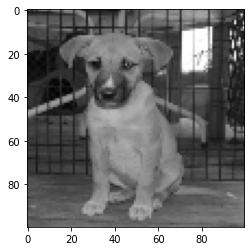

In [ ]:
IMG_SIZE = 100

new_array = cv2.resize (img_array, (IMG_SIZE, IMG_SIZE)) 
plt.imshow(new_array, cmap='gray') 
plt.show()


In [ ]:
training_data = []

def create_training_data():
    ##Dogs and cats
    for category in CATEGORIES:  

        ##Create path to dogs and cats
        path = os.path.join(DATADIR,category)  
        ##Getting the classification (0 or a 1), where 0=dog 1=cat
        class_num = CATEGORIES.index(category)  

        ##Iterating over each image per dogs and cats
        for img in tqdm(os.listdir(path)):  
            try:
                ##Converting to array
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                ##Resizing to normalize the data size
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                ##Adding to training data
                training_data.append([new_array, class_num])  
                
            ##Keeping output clean
            except Exception as e:  
                pass


create_training_data()

##Sanity check
print(len(training_data))

100%|██████████| 12485/12485 [00:14<00:00, 887.67it/s]

24914


In [ ]:
##Shuffling training data

import random
random.shuffle(training_data)

for sample in training_data[:10]: print(sample[1])

##Sanity check
print(len(training_data))


1
1
1
0
0
0
1
0
0
1
24914


import random
random.shuffle(training_data)

for sample in training_data[:10]:
  print(sample[1])

In [ ]:
X = []
y = []


##Adding features and labels to X, y arrays
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print()
print(len(X))
print(len(y))

[[[[ 81]
   [ 53]
   [ 65]
   ...
   [109]
   [107]
   [106]]

  [[ 80]
   [ 50]
   [ 56]
   ...
   [110]
   [108]
   [108]]

  [[ 80]
   [ 49]
   [ 55]
   ...
   [110]
   [110]
   [109]]

  ...

  [[ 52]
   [ 54]
   [ 53]
   ...
   [122]
   [122]
   [169]]

  [[ 53]
   [ 54]
   [ 53]
   ...
   [112]
   [127]
   [171]]

  [[ 53]
   [ 53]
   [ 54]
   ...
   [117]
   [125]
   [176]]]]

24914
24914


In [ ]:
import pickle 


##Using pickle for saving/loading data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
print(len(X))

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()
print(len(y))


24914
24914


In [ ]:
###Writing the model!
##Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import numpy as np
import time

NAME = "Cats-vs-Dogs-CNN-64x2-{}".format(int(time.time()))

##Tensorboard variable to view data graphically
tensorboard = TensorBoard(log_dir='/content/datasets/PetImages/logs/{}'.format(NAME))


##Loading data with pickle
pickle_in =  open("X.pickle", "rb")
X = pickle.load(pickle_in)
X = np.array(X)
print(len(X))

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y = np.array(y)
print(len(y))

X = X/255

##Defining initial model
model = Sequential()


##Adding layers
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

##Compiling model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

##Training
model.fit(X, y, batch_size=32, epochs=
          10, validation_split=0.1, callbacks=[tensorboard])

##Saving model, model weights, and model architecture as json
model.save("/content/drive/My Drive/THESIS/cats_and_dogs2_1-15.h5")
model.save_weights("/content/drive/My Drive/THESIS/cats_and_dogs2_weights_1-15.h5")
model_json = model.to_json
with open("/content/drive/My Drive/THESIS/cats_vs_dogs_1-15.json", "w") as json_file:
    json_file.write(model_json)

24914
24914
Epoch 1/10
166/701 [======>.......................] - ETA: 5:20 - loss: 0.7017 - accuracy: 0.5314